In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# MyDFT_MgO

In [77]:
dft_file = open('MgO/highk/EIGENVAL', 'r')
lines = dft_file.readlines()

In [78]:
[float(nums) for nums in lines[7].split()][:-1]

[0.0, 0.0, 0.0]

In [79]:
values = []
for i in np.arange(7, len(lines), 11):
    k_vb_cb = []
    # print(lines[i].split()[:-1])
    for nums in lines[i].split()[:-1]:
        k_vb_cb.append(float(nums))
    k_vb_cb.append(float(lines[i+2].split()[1]))
    k_vb_cb.append(float(lines[i+3].split()[1]))
    k_vb_cb.append(float(lines[i+4].split()[1]))
    k_vb_cb.append(float(lines[i+5].split()[1]))
    values.append(k_vb_cb)

In [80]:
df = pd.DataFrame(values, columns=['kx', 'ky', 'kz', 'vb3', 'vb2', 'vb1', 'cb'])
df

,kx,ky,kz,vb3,vb2,vb1,cb
0,0.00,0.00,0.00,1.532700,1.532704,1.532704,8.713468
1,0.04,0.00,0.00,1.414463,1.520338,1.520342,8.827846
2,0.08,0.00,0.00,1.089030,1.484281,1.484285,9.142874
3,0.12,0.00,0.00,0.615149,1.426189,1.426193,9.593267
4,0.16,0.00,0.00,0.056336,1.353391,1.353395,10.109627
...,...,...,...,...,...,...,...
450,-0.28,0.44,0.20,-1.783352,-1.590963,-0.250893,15.693345
451,-0.24,0.44,0.20,-1.884966,-1.501082,-0.181944,15.802005
452,-0.32,0.48,0.20,-2.077563,-1.190324,-0.319739,15.248786
453,-0.28,0.48,0.20,-1.902504,-1.413924,-0.331093,15.517205


In [6]:
# df.to_csv('MgO_bands.csv')

In [81]:
kxData = df['kx'].values[:13]*2*np.pi/4.2 # Converting to the units of Angstorm^-1
v1Data = df['vb1'].values[:13]
v2Data = df['vb2'].values[:13]
v3Data = df['vb3'].values[:13]
cbData = df['cb'].values[:13]

Text(0, 0.5, 'Energy $(eV)$')

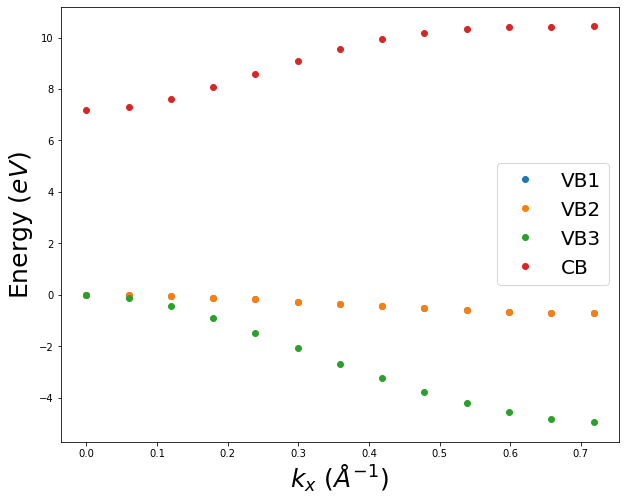

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

plt.plot(kxData, v1Data - np.max(v1Data), 'o')
plt.plot(kxData, v2Data - np.max(v1Data), 'o')
plt.plot(kxData, v3Data - np.max(v1Data), 'o')
plt.plot(kxData, cbData - np.max(v1Data), 'o')

plt.legend(['VB1', 'VB2', 'VB3', 'CB'], fontsize=20)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)

In [83]:
import lmfit

In [84]:
def fit_func(x, minv, delta):
    hbar = 0.658 # in the units of eV-fs
    return delta + hbar**2 * minv*(x**2)/(2.0)

# model = lmfit.models.ExpressionModel("delta + ((x)**2)/(2.0*m)")
model = lmfit.Model(fit_func)

In [85]:
def parab_band_param(ydata, xdata, minv_guess, delta_guess):
    param = model.fit(ydata, x = xdata, minv = minv_guess, delta = delta_guess)
    return param.best_values['minv'], param.best_values['delta']

In [86]:
print(parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0))

(-15.246347137722022, -0.0004576428574745013)


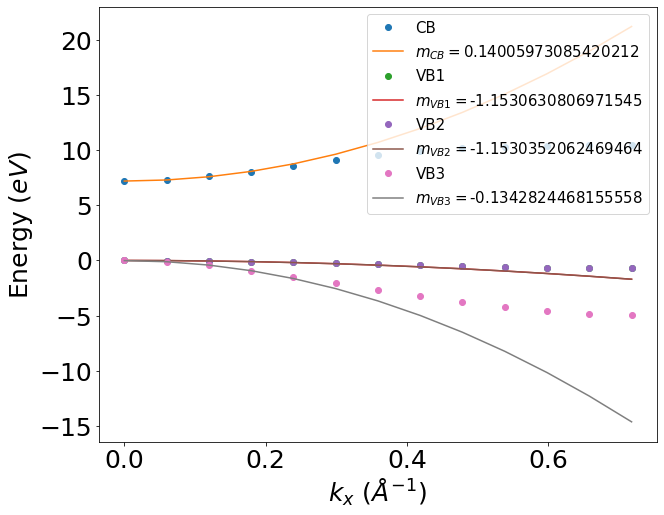

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.plot(kxData, v1Data - np.max(v1Data), 'o')
# plt.plot(kxData, v2Data - np.max(v1Data), 'o')
# plt.plot(kxData, v3Data - np.max(v1Data), 'o')
# plt.plot(kxData, cbData - np.max(v1Data), 'o')
# plt.plot(kxData, [fit_func(kx, parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0), param.best_values['delta']) for kx in kxData])
band_dict = {
    "CB" : cbData,
    "VB1" : v1Data,
    "VB2" : v2Data,
    "VB3" : v3Data
}
legend = []
for y in ["CB", "VB1", "VB2", "VB3"]:
    minv, delta = parab_band_param(band_dict[y][:4] - np.max(v1Data), kxData[:4], -6, 0)
    plt.plot(kxData, band_dict[y] - np.max(v1Data), 'o')
    plt.plot(kxData, [fit_func(kx, minv, delta) for kx in kxData])
    # Only fitting for first few data points since we want the 
    legend.append(y)
    legend.append('$m_{'+y+'}=$' + str(1/minv * 17.58)) # Since 1 eV-fs^2/Ang^2 = 17.58 m_e unit conversion
plt.legend(legend, fontsize=15)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()

## Using Interpolation

In [88]:
from scipy.interpolate import CubicSpline

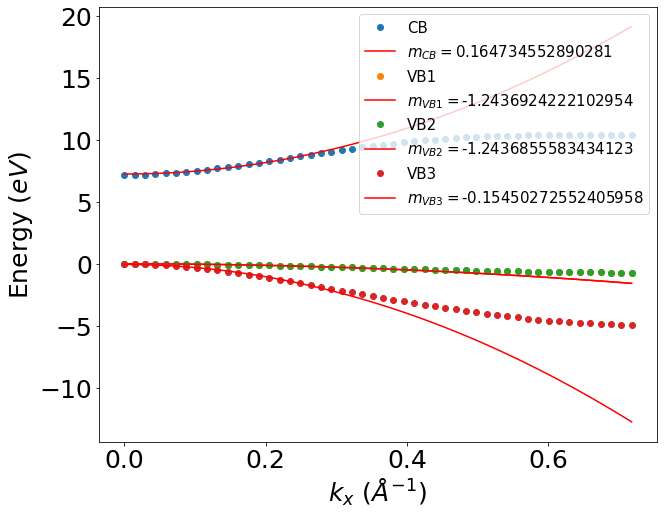

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.plot(kxData, v1Data - np.max(v1Data), 'o')
# plt.plot(kxData, v2Data - np.max(v1Data), 'o')
# plt.plot(kxData, v3Data - np.max(v1Data), 'o')
# plt.plot(kxData, cbData - np.max(v1Data), 'o')
# plt.plot(kxData, [fit_func(kx, parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0), param.best_values['delta']) for kx in kxData])
band_dict = {
    "CB" : cbData,
    "VB1" : v1Data,
    "VB2" : v2Data,
    "VB3" : v3Data
}
legend = []
for y in ["CB", "VB1", "VB2", "VB3"]:
    # plt.plot(kxData, band_dict[y] - np.max(v1Data), 'o')
    kxnew = np.linspace(0, max(kxData), num=50)
    spl = CubicSpline(kxData, band_dict[y] - np.max(v1Data))
    plt.plot(kxnew, spl(kxnew),'o')
    # minv, delta = parab_band_param(band_dict[y][:4] - np.max(v1Data), kxData[:4], -6, 0)
    # plt.plot(kxData, [fit_func(kx, minv, delta) for kx in kxData])
    minv, delta = parab_band_param(spl(kxnew[:20]), kxnew[:20], -6, 0)
    plt.plot(kxnew, [fit_func(kx, minv, delta) for kx in kxnew], '-r')
    # Only fitting for first few data points since we want the 
    legend.append(y)
    legend.append('$m_{'+y+'}=$' + str(1/minv * 17.58)) # Since 1 eV-fs^2/Ang^2 = 17.58 m_e unit conversion
plt.legend(legend, fontsize=15)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()

# Liang's DFT_MgO

In [2]:
df = pd.read_csv("bands100.dat", sep=' ', header=None)
df.columns = ['kx', 'vb3', 'vb2', 'vb1', 'cb']
df.head()

,kx,vb3,vb2,vb1,cb
0,0.000000,8.2532,8.2532,8.2532,13.1091
1,0.002384,8.2510,8.2527,8.2527,13.1115
2,0.004769,8.2445,8.2515,8.2515,13.1189
3,0.007153,8.2337,8.2495,8.2495,13.1310
4,0.009537,8.2158,8.2460,8.2460,13.1478


In [ ]:
# df.to_csv('MgO_bands.csv')

In [23]:
kxData = df['kx'].values*2*np.pi # Converting from 2*pi/Ang to the units of Angstorm^-1
v1Data = df['vb1'].values
v2Data = df['vb2'].values
v3Data = df['vb3'].values
cbData = df['cb'].values

Text(0, 0.5, 'Energy $(eV)$')

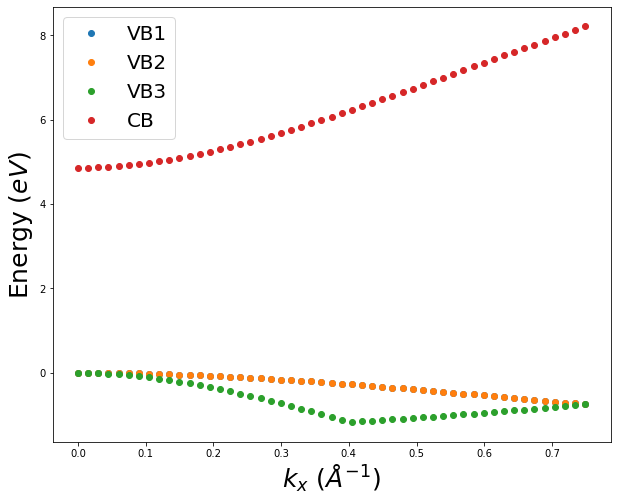

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

plt.plot(kxData, v1Data - np.max(v1Data), 'o')
plt.plot(kxData, v2Data - np.max(v1Data), 'o')
plt.plot(kxData, v3Data - np.max(v1Data), 'o')
plt.plot(kxData, cbData - np.max(v1Data), 'o')

plt.legend(['VB1', 'VB2', 'VB3', 'CB'], fontsize=20)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)

In [25]:
import lmfit

In [26]:
def fit_func(x, minv, delta):
    hbar = 0.658 # in the units of eV-fs
    return delta + hbar**2 * minv*(x**2)/(2.0)

# model = lmfit.models.ExpressionModel("delta + ((x)**2)/(2.0*m)")
model = lmfit.Model(fit_func)

In [27]:
def parab_band_param(ydata, xdata, minv_guess, delta_guess):
    param = model.fit(ydata, x = xdata, minv = minv_guess, delta = delta_guess)
    return param.best_values['minv'], param.best_values['delta']

In [28]:
print(parab_band_param(v1Data[:10] - np.max(v1Data), kxData[:10], -6, 0))

(-9.588540124530667, 0.00024766798450209766)


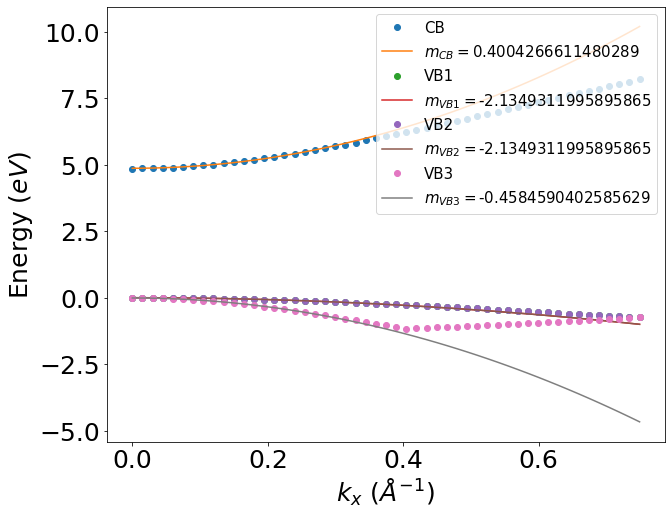

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.plot(kxData, v1Data - np.max(v1Data), 'o')
# plt.plot(kxData, v2Data - np.max(v1Data), 'o')
# plt.plot(kxData, v3Data - np.max(v1Data), 'o')
# plt.plot(kxData, cbData - np.max(v1Data), 'o')
# plt.plot(kxData, [fit_func(kx, parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0), param.best_values['delta']) for kx in kxData])
band_dict = {
    "CB" : cbData,
    "VB1" : v1Data,
    "VB2" : v2Data,
    "VB3" : v3Data
}
legend = []
for y in ["CB", "VB1", "VB2", "VB3"]:
    minv, delta = parab_band_param(band_dict[y][:20] - np.max(v1Data), kxData[:20], -6, 0)
    plt.plot(kxData, band_dict[y] - np.max(v1Data), 'o')
    plt.plot(kxData, [fit_func(kx, minv, delta) for kx in kxData])
    # Only fitting for first few data points since we want the 
    legend.append(y)
    legend.append('$m_{'+y+'}=$' + str(1/minv * 17.58)) # Since 1 eV-fs^2/Ang^2 = 17.58 m_e unit conversion
plt.legend(legend, fontsize=15)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()

# MyDFT_ZnO

In [3]:
dft_file = open('ZnO/EIGENVAL', 'r')
lines = dft_file.readlines()

In [8]:
[float(nums) for nums in lines[7].split()][:-1]

[0.0, 0.0, 0.0]

In [9]:
len(lines)

6000

In [12]:
values = []
for i in np.arange(7, len(lines), 27):
    k_vb_cb = []
    # print(lines[i].split()[:-1])
    for nums in lines[i].split()[:-1]:
        k_vb_cb.append(float(nums))
    k_vb_cb.append(float(lines[i+16].split()[1]))
    k_vb_cb.append(float(lines[i+17].split()[1]))
    k_vb_cb.append(float(lines[i+18].split()[1]))
    k_vb_cb.append(float(lines[i+19].split()[1]))
    values.append(k_vb_cb)

In [13]:
df = pd.DataFrame(values, columns=['kx', 'ky', 'kz', 'vb3', 'vb2', 'vb1', 'cb'])
df

,kx,ky,kz,vb3,vb2,vb1,cb
0,0.000000,0.000000e+00,0.0,-4.593626,-4.573710,-4.573703,0.599961
1,0.055556,0.000000e+00,0.0,-4.721991,-4.614484,-4.595999,0.774387
2,0.111111,0.000000e+00,0.0,-5.092927,-4.673955,-4.654133,1.238114
3,0.166667,-1.387779e-17,0.0,-5.569192,-4.770294,-4.743818,1.876684
4,0.222222,-1.387779e-17,0.0,-5.782437,-4.908441,-4.858029,2.605869
...,...,...,...,...,...,...,...
217,0.333333,2.222222e-01,0.5,-6.740622,-5.625889,-5.625889,6.895070
218,0.388889,2.222222e-01,0.5,-6.801576,-5.618569,-5.618569,7.069924
219,0.277778,2.777778e-01,0.5,-6.840426,-5.618770,-5.618770,7.043511
220,0.333333,2.777778e-01,0.5,-7.003062,-5.606177,-5.606177,7.508260


In [16]:
kxData = df['kx'].values[:10]*2*np.pi/4.2 # Converting to the units of Angstorm^-1
v1Data = df['vb1'].values[:10]
v2Data = df['vb2'].values[:10]
v3Data = df['vb3'].values[:10]
cbData = df['cb'].values[:10]

Text(0, 0.5, 'Energy $(eV)$')

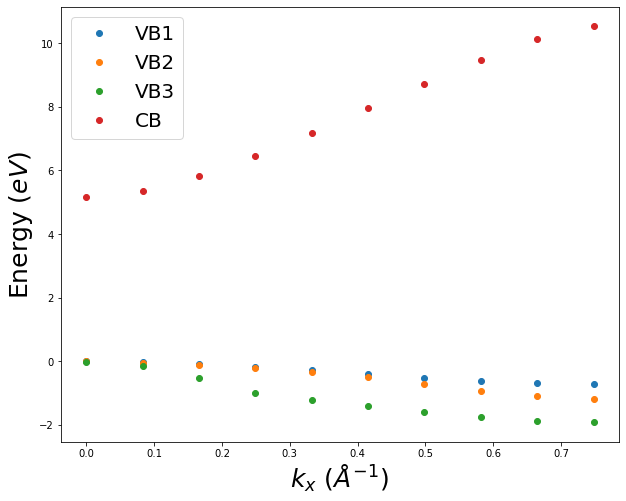

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

plt.plot(kxData, v1Data - np.max(v1Data), 'o')
plt.plot(kxData, v2Data - np.max(v1Data), 'o')
plt.plot(kxData, v3Data - np.max(v1Data), 'o')
plt.plot(kxData, cbData - np.max(v1Data), 'o')

plt.legend(['VB1', 'VB2', 'VB3', 'CB'], fontsize=20)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)

In [19]:
import lmfit

In [20]:
def fit_func(x, minv, delta):
    hbar = 0.658 # in the units of eV-fs
    return delta + hbar**2 * minv*(x**2)/(2.0)

# model = lmfit.models.ExpressionModel("delta + ((x)**2)/(2.0*m)")
model = lmfit.Model(fit_func)

In [21]:
def parab_band_param(ydata, xdata, minv_guess, delta_guess):
    param = model.fit(ydata, x = xdata, minv = minv_guess, delta = delta_guess)
    return param.best_values['minv'], param.best_values['delta']

In [22]:
print(parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0))

(-12.557534549797952, -0.002488297806059301)


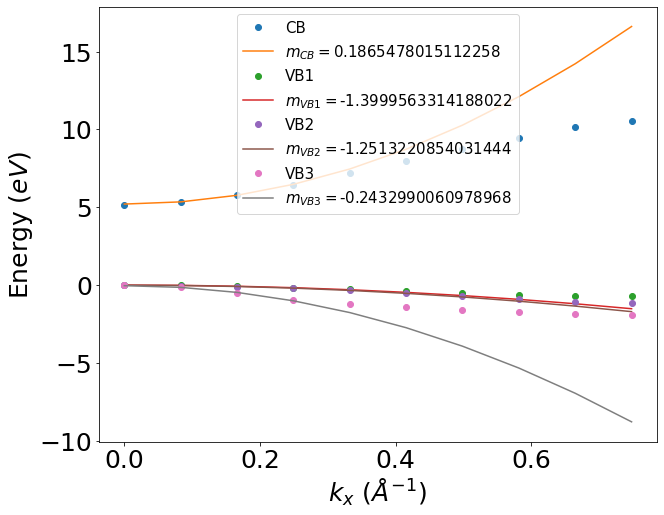

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.plot(kxData, v1Data - np.max(v1Data), 'o')
# plt.plot(kxData, v2Data - np.max(v1Data), 'o')
# plt.plot(kxData, v3Data - np.max(v1Data), 'o')
# plt.plot(kxData, cbData - np.max(v1Data), 'o')
# plt.plot(kxData, [fit_func(kx, parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0), param.best_values['delta']) for kx in kxData])
band_dict = {
    "CB" : cbData,
    "VB1" : v1Data,
    "VB2" : v2Data,
    "VB3" : v3Data
}
legend = []
for y in ["CB", "VB1", "VB2", "VB3"]:
    minv, delta = parab_band_param(band_dict[y][:4] - np.max(v1Data), kxData[:4], -6, 0)
    plt.plot(kxData, band_dict[y] - np.max(v1Data), 'o')
    plt.plot(kxData, [fit_func(kx, minv, delta) for kx in kxData])
    # Only fitting for first few data points since we want the 
    legend.append(y)
    legend.append('$m_{'+y+'}=$' + str(1/minv * 17.58)) # Since 1 eV-fs^2/Ang^2 = 17.58 m_e unit conversion
plt.legend(legend, fontsize=15)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()

## Using Interpolation

In [24]:
from scipy.interpolate import CubicSpline

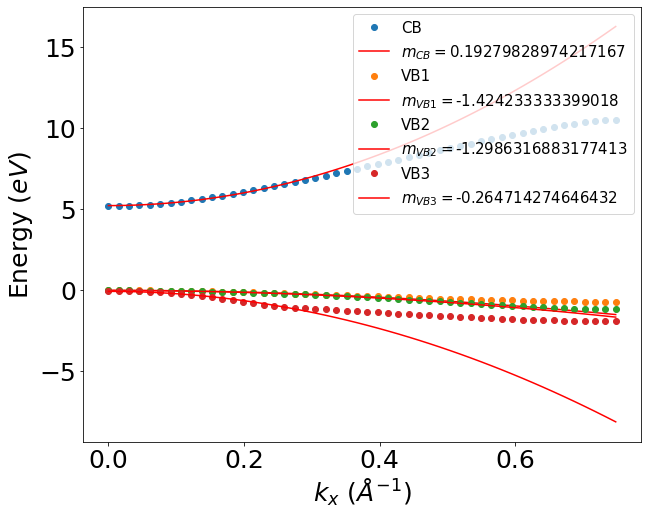

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.plot(kxData, v1Data - np.max(v1Data), 'o')
# plt.plot(kxData, v2Data - np.max(v1Data), 'o')
# plt.plot(kxData, v3Data - np.max(v1Data), 'o')
# plt.plot(kxData, cbData - np.max(v1Data), 'o')
# plt.plot(kxData, [fit_func(kx, parab_band_param(v1Data[:4] - np.max(v1Data), kxData[:4], -6, 0), param.best_values['delta']) for kx in kxData])
band_dict = {
    "CB" : cbData,
    "VB1" : v1Data,
    "VB2" : v2Data,
    "VB3" : v3Data
}
legend = []
for y in ["CB", "VB1", "VB2", "VB3"]:
    # plt.plot(kxData, band_dict[y] - np.max(v1Data), 'o')
    kxnew = np.linspace(0, max(kxData), num=50)
    spl = CubicSpline(kxData, band_dict[y] - np.max(v1Data))
    plt.plot(kxnew, spl(kxnew),'o')
    # minv, delta = parab_band_param(band_dict[y][:4] - np.max(v1Data), kxData[:4], -6, 0)
    # plt.plot(kxData, [fit_func(kx, minv, delta) for kx in kxData])
    minv, delta = parab_band_param(spl(kxnew[:20]), kxnew[:20], -6, 0)
    plt.plot(kxnew, [fit_func(kx, minv, delta) for kx in kxnew], '-r')
    # Only fitting for first few data points since we want the 
    legend.append(y)
    legend.append('$m_{'+y+'}=$' + str(1/minv * 17.58)) # Since 1 eV-fs^2/Ang^2 = 17.58 m_e unit conversion
plt.legend(legend, fontsize=15)
plt.xlabel("$k_x\ (\AA^{-1})$", fontsize=25)
plt.ylabel("Energy $(eV)$", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()